## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

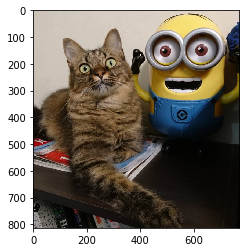

In [2]:
import skimage.io as skio
img1 = skio.imread('data/example.jpg')
plt.imshow(img1)
plt.show()

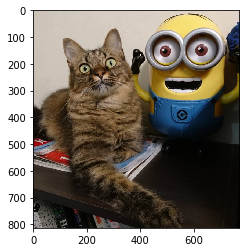

In [3]:
from PIL import Image
img2 = Image.open('data/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

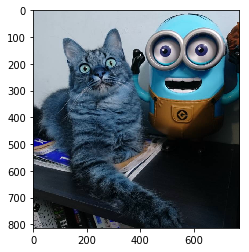

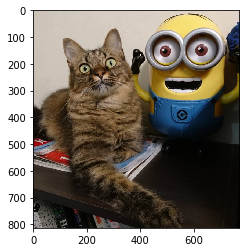

In [4]:
import cv2
img3 = cv2.imread('data/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [7]:
N_times = 10

In [9]:
%%timeit
im = np.array([skio.imread('data/example.jpg') for _ in range(N_times)])

153 ms ± 587 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit
im = np.array([np.array(Image.open('data/example.jpg')) for _ in range(N_times)])

153 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('data/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

151 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 將影像存成 mat

In [14]:
import scipy.io as sio
sio.savemat(file_name='data/examples/example.mat', mdict={'img': img1})

In [15]:
mat_arr = sio.loadmat('data/examples/example.mat')
print(mat_arr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'img'])


In [16]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


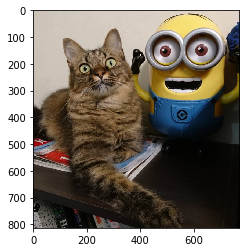

In [17]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [47]:
import urllib
import pandas as pd
import requests
#response = requests.get('https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt')
#print(response.text)

data = []
#content=urllib.request.urlopen("https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt") 
with open("data/examples/imagenet_urls_examples.txt", 'r' , encoding = 'utf8') as f:
    for line in f:
        line = line.replace('\n', '').split('\t')
        data.append(line)
data

[['n00015388_157',
  'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'],
 ['n00015388_238',
  'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'],
 ['n00015388_304',
  'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'],
 ['n00015388_327',
  'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'],
 ['n00015388_355',
  'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
 ['n00015388_373', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg'],
 ['n00015388_379',
  'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg'],
 ['n00015388_388',
  'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg'],
 ['n00015388_442',
  'http://www.porschemania.it/discus/messages/815/102099.jpg'],
 ['n00015388_474',
  'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg'],
 ['n00015388_514',
  'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jp

In [24]:
df = pd.DataFrame(data)
df.columns = ['Seqno', 'URL']
df

,Seqno,URL
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...
7,n00015388_388,http://www.deweekkrant.nl/images/library/pictu...
8,n00015388_442,http://www.porschemania.it/discus/messages/815...
9,n00015388_474,http://farm1.static.flickr.com/72/225029238_80...


In [42]:
# import the necessary packages
import numpy as np
import urllib
import cv2
import sys
 
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


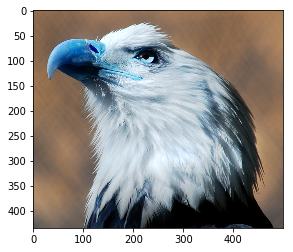

http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg


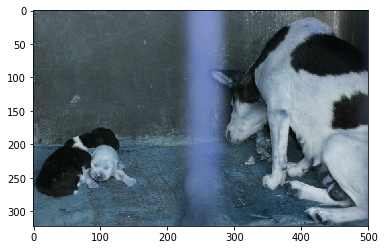

http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg


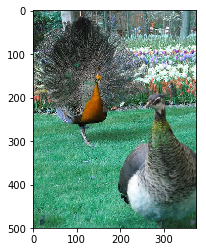

http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg


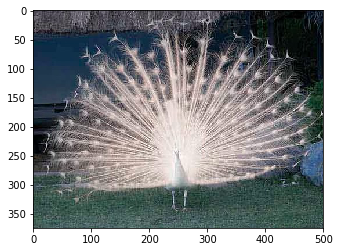

http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Unexpected error: (<class 'urllib.error.HTTPError'>, <HTTPError 404: 'Not Found'>, <traceback object at 0x000001C109ABFFC8>)


In [45]:
try:
    data = []
    with open("data/examples/imagenet_urls_examples.txt", 'r' , encoding = 'utf8') as f:
        for line in f:
            line = line.replace('\n', '').split('\t')
            data.append(line)
    df = pd.DataFrame(data)
    df.columns = ['Seqno', 'URL']    
    for x in range(5):
        #print(df.loc[x]['URL'])
        url = df.iat[ x,1 ]
        #print(url)
        plt.imshow(url_to_image(url))
        plt.show()
except:
    print("Unexpected error:", sys.exc_info())